
# Project: Investigate a Dataset (TMDB-Movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected the tmdb-movies data to analyze. This data comprises on various attributes on what it takes to make a movie such as the cast, director, budget, revenue. The data has 10866 rows.
>
### Questions I will be answering in this project
>How the movies budgets relate to the revenue and profit?
>
> Which movies had the highest and lowest revenue?
>
> Which movies had the highest and lowest budget?
>
> Which movies had the highest and lowest profit.?
>
>Average running time of the movies?

In [1]:
#importing relevant libraries that will be used through out the analysis of this data.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
### Data Wrangling

In [2]:
# Loading data and checking a few lines
df_movies = pd.read_csv('tmdb-movies.csv')

#This shows the first 10 records for us to get a view of how the data looks.
df_movies.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
# Using the head function above, I get to see the first 10 records. This gives an idea of what the data is all about.

In [4]:
# This shows the number of non-null values in every column so that I can decide which to drop
#This also shows the data type of each column.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning (This step will involve changing release_date from string to date format)
### The first step taken is to select the rows that are going to help us answer certain questions.
### In some instances we can create a new dataframe if the columns we need to use are way less that the columns that we need to drop.

In [5]:
# In the cell below I have created a new dataframe with only columns that I am going to use in answering the questions.

In [6]:

df_movies2 = df_movies[['budget','revenue','original_title','runtime','release_date','release_year']].copy()

#check for successful output
df_movies2.head()


,budget,revenue,original_title,runtime,release_date,release_year
0,150000000,1513528810,Jurassic World,124,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,120,5/13/15,2015
2,110000000,295238201,Insurgent,119,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,2015
4,190000000,1506249360,Furious 7,137,4/1/15,2015


In [7]:
# The describe functions gives a summary statistics of all the columns
df_movies2.describe()

,budget,revenue,runtime,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [8]:
# This gives back a few of the rows at the bottom.
df_movies2.tail(10)

,budget,revenue,original_title,runtime,release_date,release_year
10856,0,0,The Ugly Dachshund,93,2/16/66,1966
10857,0,0,Nevada Smith,128,6/10/66,1966
10858,0,0,"The Russians Are Coming, The Russians Are Coming",126,5/25/66,1966
10859,0,0,Seconds,100,10/5/66,1966
10860,0,0,Carry On Screaming!,87,5/20/66,1966
10861,0,0,The Endless Summer,95,6/15/66,1966
10862,0,0,Grand Prix,176,12/21/66,1966
10863,0,0,Beregis Avtomobilya,94,1/1/66,1966
10864,0,0,"What's Up, Tiger Lily?",80,11/2/66,1966
10865,19000,0,Manos: The Hands of Fate,74,11/15/66,1966


In [9]:
# From the cell above we can see that there are movies with zero budget and revenue.
# We are going remove this rows at the cleaning phase so that it doesn't affect analysis.

In [10]:
#check for rows with zero in revenue, buddget, runtime.
#This process will help us deal with outliers

#create a list of the three
rows_to_check = ['budget','revenue','runtime']

#replace 0 with NaN
df_movies2[rows_to_check] = df_movies[rows_to_check].replace(0, np.NaN)

#Droping the rows and saving the changes
df_movies2.dropna(subset = rows_to_check, inplace = True)


In [11]:
#check for duplicates and keep the first occurence then drop the rest
df_movies2.drop_duplicates(keep = 'first', inplace = True)

#this shows how many rows and column are left
df_movies2.shape

(3854, 6)

In [12]:
# checking if there are any duplicates remaining
df_movies2.duplicated().sum()

0

In [13]:
# convert release date from string into type date
df_movies2.release_date = pd.to_datetime(df_movies['release_date'])

#the output below will confirm that the release_date is in the correct format
df_movies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   runtime         3854 non-null   float64       
 4   release_date    3854 non-null   datetime64[ns]
 5   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 210.8+ KB


In [14]:
df_movies2.head()


,budget,revenue,original_title,runtime,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2015


In [15]:
# Most of the data was clean and there wasn't to be changed at the data cleaning stage.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Calculating Profit)

In [16]:
# The first step is adding another column to show profits made from the movies.
# The column in inserted at a specific position so that the data remains easily readable.

# Create a profit column and calculate the profit.
df_movies2['profit'] = df_movies2['revenue'] - df_movies2['budget']

#This shows a few rows to confirm that the profit column was added.
df_movies2.head()


,budget,revenue,original_title,runtime,release_date,release_year,profit
0,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,2015,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,2015,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2015,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,2015,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2015,1.316249e+09


In [17]:
### Research Question 2 Calculating highest and lowest : profit, revenue and budget

In [18]:
# The Functions I have used below will help in avoiding repetition.
# In the functions below i used idxmax and idxmin from the pandas documentation website.
# idxmax - gives the index of the max value in the passed column
# idxmin - gives the index of the min value in the passed column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html - source of the code

In [19]:
#calculating highest value in profit, revenue, budget
def get_highest(column_name):
    
    highest_index = df_movies2[column_name].idxmax()
    highest_details = pd.DataFrame(df_movies2.loc[highest_index])
    
    return highest_details

In [20]:
#calculating lowest value in profit, revenue, budget
def get_lowest(column_name):
    
    lowest_index = df_movies2[column_name].idxmin()
    lowest_details = pd.DataFrame(df_movies2.loc[lowest_index])
    
    return lowest_details

In [21]:
#get highest profit
get_highest('profit')

,1386
budget,237000000.0
revenue,2781505847.0
original_title,Avatar
runtime,162.0
release_date,2009-12-10 00:00:00
release_year,2009
profit,2544505847.0


In [22]:
#The table above shows all the details of the movie with the highest profit.

In [23]:
#get lowest profit
get_lowest('profit')

,2244
budget,425000000.0
revenue,11087569.0
original_title,The Warrior's Way
runtime,100.0
release_date,2010-12-02 00:00:00
release_year,2010
profit,-413912431.0


In [24]:
#The table above shows all the details of the movie with the lowest profit. The budget allocated was more that the revenue generated.

In [25]:
#get highest budget
get_highest('budget')

,2244
budget,425000000.0
revenue,11087569.0
original_title,The Warrior's Way
runtime,100.0
release_date,2010-12-02 00:00:00
release_year,2010
profit,-413912431.0


In [26]:
#The table above diplays details of the movie with the highest budget.

In [27]:
#get lowest budget
get_lowest('budget')

,2618
budget,1.0
revenue,100.0
original_title,Lost & Found
runtime,95.0
release_date,1999-04-23 00:00:00
release_year,1999
profit,99.0


In [28]:
#The table above diplays details of the movie with the lowest budget.

In [29]:
#get highest revenue
get_highest('revenue')

,1386
budget,237000000.0
revenue,2781505847.0
original_title,Avatar
runtime,162.0
release_date,2009-12-10 00:00:00
release_year,2009
profit,2544505847.0


In [30]:
#The table above diplays details of the movie with the highest revenue.

In [31]:
#get lowest revenue
get_lowest('revenue')

,5067
budget,6000000.0
revenue,2.0
original_title,Shattered Glass
runtime,94.0
release_date,2003-11-14 00:00:00
release_year,2003
profit,-5999998.0


In [32]:
#The table above diplays details of the movie with the lowest revenue.

In [33]:
# average runtime of the movies
average_runtime = df_movies2['runtime'].mean()

average_runtime

109.22029060716139

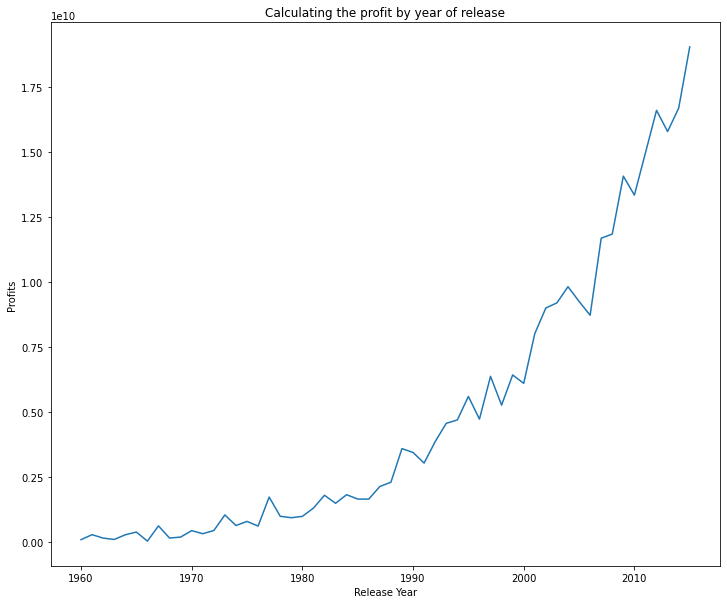

In [34]:
# Calculating profits by year
# The plot below is meant to show the profit progress over the years.
#The labeling of the figure below is per some of the examples in Fundamentals of Data Visualization book.
profit_by_year = df_movies2.groupby('release_year')['profit'].sum()

plt.figure(figsize=(12,10))

#Label the axis and giving a title
plt.xlabel('Release Year')
plt.ylabel('Profits')
plt.title('Calculating the profit by year of release')

plt.plot(profit_by_year)

# making the diagram visible
plt.show()


In [35]:
#The plot above shows how profit of made from the movies has increased over the years.

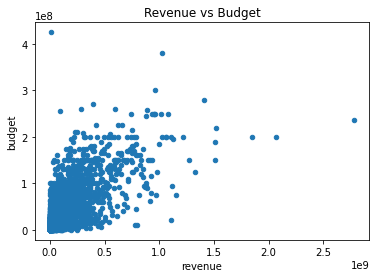

In [36]:
# Revenue vs Budget
# Below I have ploted the revenue against budget
df_movies2.plot(kind='scatter', x ='revenue', y= 'budget', title='Revenue vs Budget');
plt.show()


In [37]:
# From the plot above we can conclude that movies with high revenue also had a high budget.

<AxesSubplot:title={'center':' Revenue vs Profit'}, xlabel='revenue', ylabel='profit'>

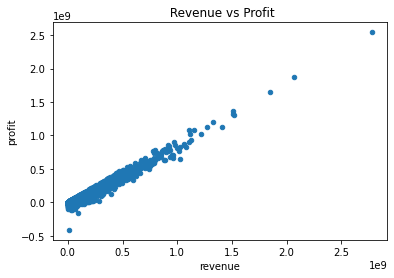

In [38]:
#Revenue vs Profit
# Below I have ploted the revenue against profit
df_movies2.plot(kind='scatter', x='revenue', y='profit', title=' Revenue vs Profit')

In [ ]:
# The above plot shows that the movies that had high revenues translated to having high profits.

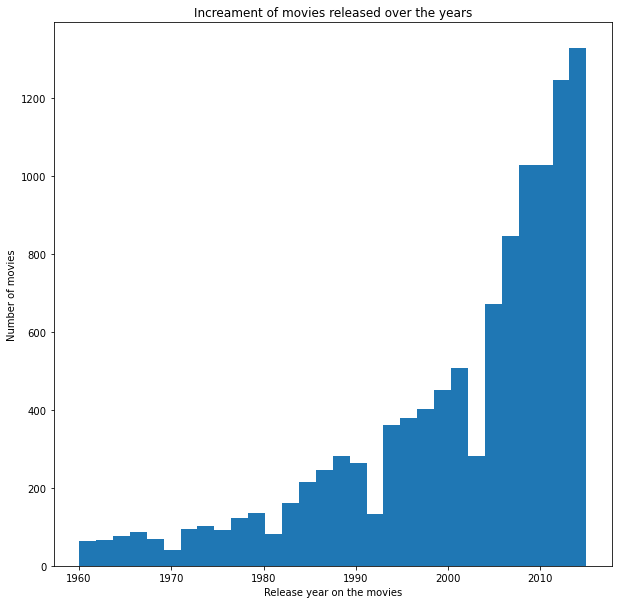

In [40]:
# The plot below is meant to give us an ideal of movies released over the years
plt.figure(figsize=(10,10))
plt.hist(df_movies.release_year, bins = 30)
plt.title('Increament of movies released over the years')
plt.xlabel('Release year on the movies')
plt.ylabel('Number of movies')
plt.show()

In [39]:
# The above plot shows that over the years more movies are released compared to the previous. In most decades the movies released doubled the previous year.

<a id='conclusions'></a>
## Conclusions

> From the provided data I have been able to find the most profitable and the least profitable movies.

>It was also evidents that most of the movies provided are between 100minutes and and 120minutes long.

>Movies are also making more profits as years go by.

### Limitations
>There are some factors that might have affected how different movies performed since not all of them were produced under the same circumstances. Such differences include Budget, Production team, Casts.